# (Homework) Week 7 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** \
**Email:**

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.


--- Single Round Simulation ---
Operator secretly picked Die: A
Rolled 10 times, observed 1 sixes.

Likelihoods P(k|Die):
  P(k=1|A) = 0.3874
  P(k=1|B) = 0.1211
  P(k=1|C) = 0.0016

Posterior Probabilities P(Die|k):
  P(A|k=1) = 0.7596
  P(B|k=1) = 0.2373
  P(C|k=1) = 0.0031

Inferred Die: A
Inference Correct: True

--- Plotting Results for Single Round ---


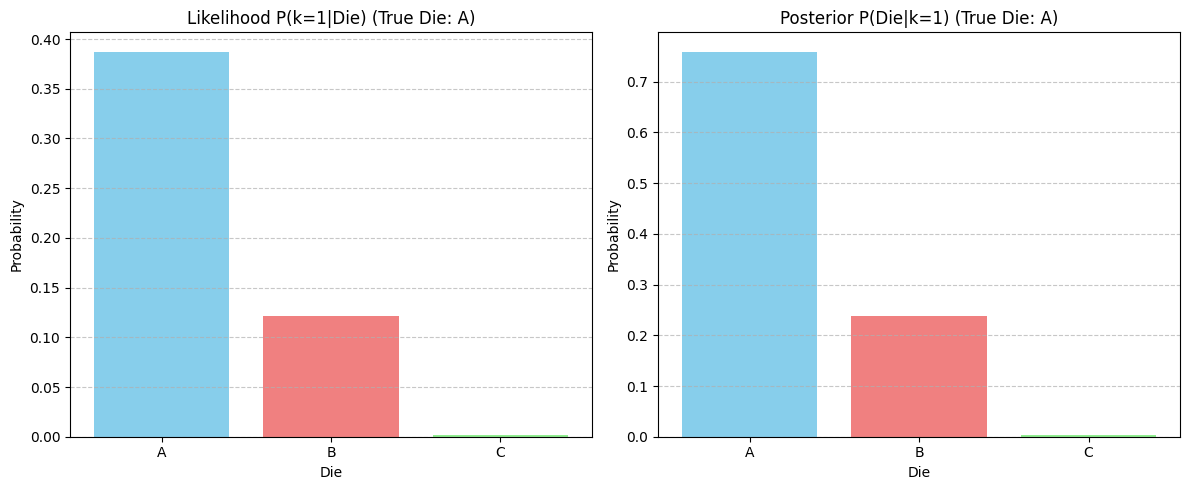


--- Evaluating Inference Accuracy (100 Rounds) ---
Out of 100 rounds, correctly inferred die in 82 cases.
Inference Accuracy: 82.00%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
dice_properties = {
    'A': {'P(6)': 0.10, 'P(1-5)': 0.90},
    'B': {'P(6)': 0.30, 'P(1-5)': 0.70},
    'C': {'P(6)': 0.60, 'P(1-5)': 0.40}
}
die_names = list(dice_properties.keys())
p_sixes = {die: props['P(6)'] for die, props in dice_properties.items()}

p_prior = {die: 1/len(die_names) for die in die_names}

n_rolls = 10

def simulate_roll(true_die):
    """Simulates 10 rolls of the given die and returns the number of sixes."""
    p = p_sixes[true_die]
    num_sixes = np.random.binomial(n_rolls, p)
    return num_sixes

def calculate_likelihood(k, die_name):
    """Calculates P(k|Die) using the binomial distribution."""
    p = p_sixes[die_name]
    return binom.pmf(k, n_rolls, p)

def calculate_posterior(k):
    """Calculates posterior probabilities P(Die|k) for all dice."""
    numerator = {die: calculate_likelihood(k, die) * p_prior[die] for die in die_names}
    denominator = sum(numerator.values())

    if denominator == 0:
        return {die: 0 for die in die_names}
    posterior = {die: num / denominator for die, num in numerator.items()}
    return posterior

def plot_probabilities(k, likelihoods, posterior_probs, true_die):
    """Plots likelihoods and posterior probabilities."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    likelihood_values = [likelihoods[die] for die in die_names]
    axes[0].bar(die_names, likelihood_values, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[0].set_title(f'Likelihood P(k={k}|Die) (True Die: {true_die})')
    axes[0].set_xlabel('Die')
    axes[0].set_ylabel('Probability')
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    posterior_values = [posterior_probs[die] for die in die_names]
    axes[1].bar(die_names, posterior_values, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[1].set_title(f'Posterior P(Die|k={k}) (True Die: {true_die})')
    axes[1].set_xlabel('Die')
    axes[1].set_ylabel('Probability')
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

print("\n--- Single Round Simulation ---")

# 1. Simulate the experiment
true_die_one_round = np.random.choice(die_names)
k_observed_one_round = simulate_roll(true_die_one_round)
print(f"Operator secretly picked Die: {true_die_one_round}")
print(f"Rolled {n_rolls} times, observed {k_observed_one_round} sixes.")

# 2. Compute posterior probabilities
likelihoods_one_round = {die: calculate_likelihood(k_observed_one_round, die) for die in die_names}
posterior_one_round = calculate_posterior(k_observed_one_round)

print("\nLikelihoods P(k|Die):")
for die, lik in likelihoods_one_round.items():
    print(f"  P(k={k_observed_one_round}|{die}) = {lik:.4f}")

print("\nPosterior Probabilities P(Die|k):")
for die, prob in posterior_one_round.items():
    print(f"  P({die}|k={k_observed_one_round}) = {prob:.4f}")

inferred_die_one_round = max(posterior_one_round, key=posterior_one_round.get)
print(f"\nInferred Die: {inferred_die_one_round}")
print(f"Inference Correct: {inferred_die_one_round == true_die_one_round}")

# --- Task 3: Plot likelihoods and posterior probabilities ---
print("\n--- Plotting Results for Single Round ---")
plot_probabilities(k_observed_one_round, likelihoods_one_round, posterior_one_round, true_die_one_round)

# --- Task 4: Evaluate inference accuracy over 100 rounds ---
print("\n--- Evaluating Inference Accuracy (100 Rounds) ---")
n_rounds = 100
correct_inferences = 0

for _ in range(n_rounds):
    true_die = np.random.choice(die_names)
    k_observed = simulate_roll(true_die)
    posterior_probs = calculate_posterior(k_observed)
    inferred_die = max(posterior_probs, key=posterior_probs.get)

    if inferred_die == true_die:
        correct_inferences += 1

accuracy = correct_inferences / n_rounds
print(f"Out of {n_rounds} rounds, correctly inferred die in {correct_inferences} cases.")
print(f"Inference Accuracy: {accuracy:.2%}")


## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

Coefficients (w): [5. 0.]
Intercept (w0): 5.0000
Slope (w1): 0.0000


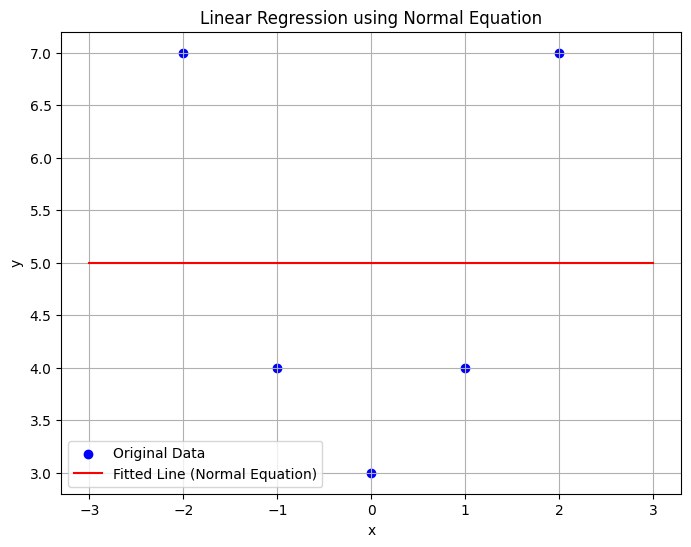

In [2]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

# 1. Construct the design matrix X
X = np.vstack((np.ones(len(x)), x)).T

# 2. Calculate the transpose of X
X_transpose = X.T

# 3. Calculate (X_transpose * X)
X_transpose_X = X_transpose @ X

# 4. Calculate the inverse of (X_transpose * X)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# 5. Calculate (X_transpose * y)
X_transpose_y = X_transpose @ y

# 6. Calculate the coefficients (w) using the normal equation
w = X_transpose_X_inv @ X_transpose_y

intercept = w[0]
slope = w[1]

print(f"Coefficients (w): {w}")
print(f"Intercept (w0): {intercept:.4f}")
print(f"Slope (w1): {slope:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Original Data')

x_fit = np.linspace(min(x) - 1, max(x) + 1, 100)
plt.plot(x_fit, y_fit, color='red', label='Fitted Line (Normal Equation)')

plt.title('Linear Regression using Normal Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

--- Gradient Descent with alpha = 0.00250 ---
First 5 steps:
Step 0: w = 10.000000, f(w) = 5.000000
Step 1: w = 10.050000, f(w) = 4.072531
Step 2: w = 10.092869, f(w) = 3.385716
Step 3: w = 10.130192, f(w) = 2.861959
Step 4: w = 10.163095, f(w) = 2.452866

--- Gradient Descent with alpha = 0.00000025 ---
First 5 steps:
Step 0: w = 10.000000, f(w) = 5.000000
Step 1: w = 10.000005, f(w) = 4.999900
Step 2: w = 10.000010, f(w) = 4.999800
Step 3: w = 10.000015, f(w) = 4.999700
Step 4: w = 10.000020, f(w) = 4.999600


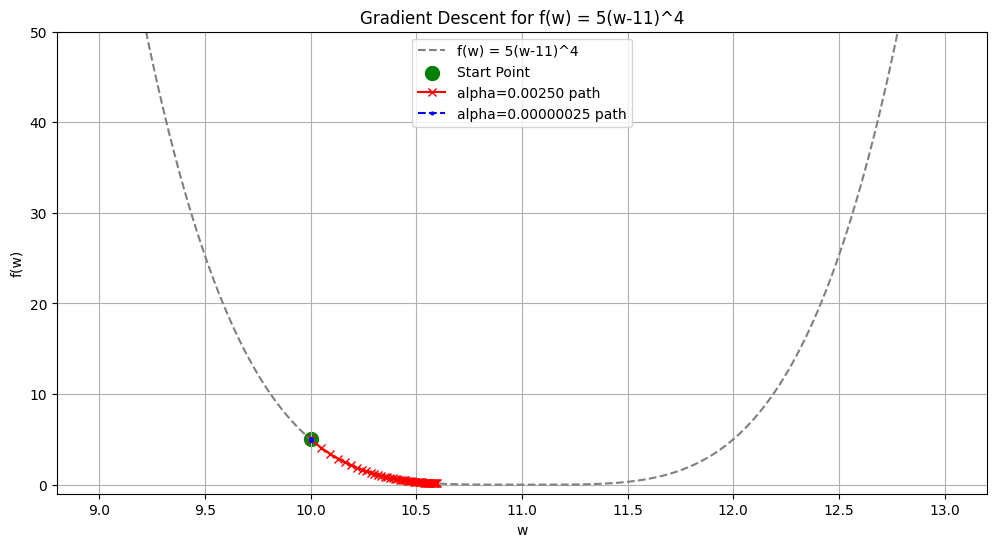

In [3]:
def f(w):
    return 5 * (w - 11)**4

def df(w):
    return 20 * (w - 11)**3

def gradient_descent(start_w, learning_rate, n_steps):
    w_history = [start_w]
    f_history = [f(start_w)]
    w = start_w

    for i in range(n_steps):
        gradient = df(w)
        w = w - learning_rate * gradient
        w_history.append(w)
        f_history.append(f(w))
    return np.array(w_history), np.array(f_history)


initial_w = 10.0

# --- Case 1: alpha = 1/400 ---
alpha_1 = 1/400
n_steps_1 = 50

print(f"--- Gradient Descent with alpha = {alpha_1:.5f} ---")
w_history_1, f_history_1 = gradient_descent(initial_w, alpha_1, n_steps_1)

print("First 5 steps:")
for i in range(min(5, len(w_history_1))):
    print(f"Step {i}: w = {w_history_1[i]:.6f}, f(w) = {f_history_1[i]:.6f}")

# --- Case 2: alpha = 1/4000000 ---
alpha_2 = 1/4000000
n_steps_2 = 500

print(f"\n--- Gradient Descent with alpha = {alpha_2:.8f} ---")
w_history_2, f_history_2 = gradient_descent(initial_w, alpha_2, n_steps_2)

print("First 5 steps:")
for i in range(min(5, len(w_history_2))):
    print(f"Step {i}: w = {w_history_2[i]:.6f}, f(w) = {f_history_2[i]:.6f}")

# --- Visualization ---
plt.figure(figsize=(12, 6))

w_values = np.linspace(9, 13, 400)
f_values = f(w_values)
plt.plot(w_values, f_values, label='f(w) = 5(w-11)^4', color='gray', linestyle='--')

plt.scatter(w_history_1[0], f_history_1[0], color='green', marker='o', s=100, label='Start Point')
plt.plot(w_history_1, f_history_1, marker='x', linestyle='-', color='red', label=f'alpha={alpha_1:.5f} path')

plt.plot(w_history_2, f_history_2, marker='.', linestyle='--', color='blue', label=f'alpha={alpha_2:.8f} path', markersize=4)

plt.title('Gradient Descent for f(w) = 5(w-11)^4')
plt.xlabel('w')
plt.ylabel('f(w)')
plt.grid(True)
plt.legend()
plt.ylim(-1, 50)


ALL THE BEST!